In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('adult.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print(df)

       0                  1       2            3   4                    5   \
0      39          State-gov   77516    Bachelors  13        Never-married   
1      50   Self-emp-not-inc   83311    Bachelors  13   Married-civ-spouse   
2      38            Private  215646      HS-grad   9             Divorced   
3      53            Private  234721         11th   7   Married-civ-spouse   
4      28            Private  338409    Bachelors  13   Married-civ-spouse   
...    ..                ...     ...          ...  ..                  ...   
32556  27            Private  257302   Assoc-acdm  12   Married-civ-spouse   
32557  40            Private  154374      HS-grad   9   Married-civ-spouse   
32558  58            Private  151910      HS-grad   9              Widowed   
32559  22            Private  201490      HS-grad   9        Never-married   
32560  52       Self-emp-inc  287927      HS-grad   9   Married-civ-spouse   

                       6               7       8        9      

In [4]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


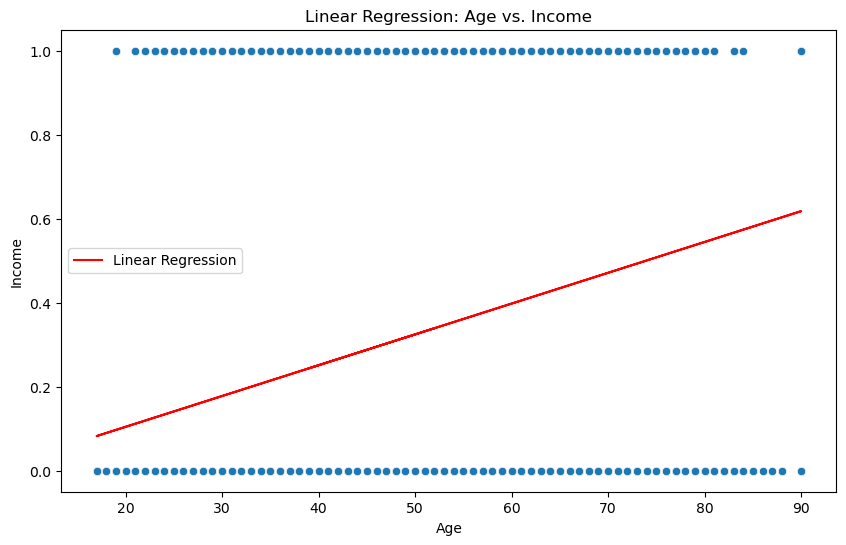

In [5]:
# Preprocess the 'income' column
label_encoder = LabelEncoder()
# Remove non-numeric values from 'age' column
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows with NaN values (if any)
df = df.dropna(subset=['age'])

# Convert 'age' column to float
df['age'] = df['age'].astype(float)
df['income'] = label_encoder.fit_transform(df['income'])

# Selecting 'age' as predictor and 'income' as target variable
X = df[['age']]  # Predictor
y = df['income']  # Target variable

# Initialize and fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predicting income based on age
y_pred = regression_model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=df)
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.title('Linear Regression: Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

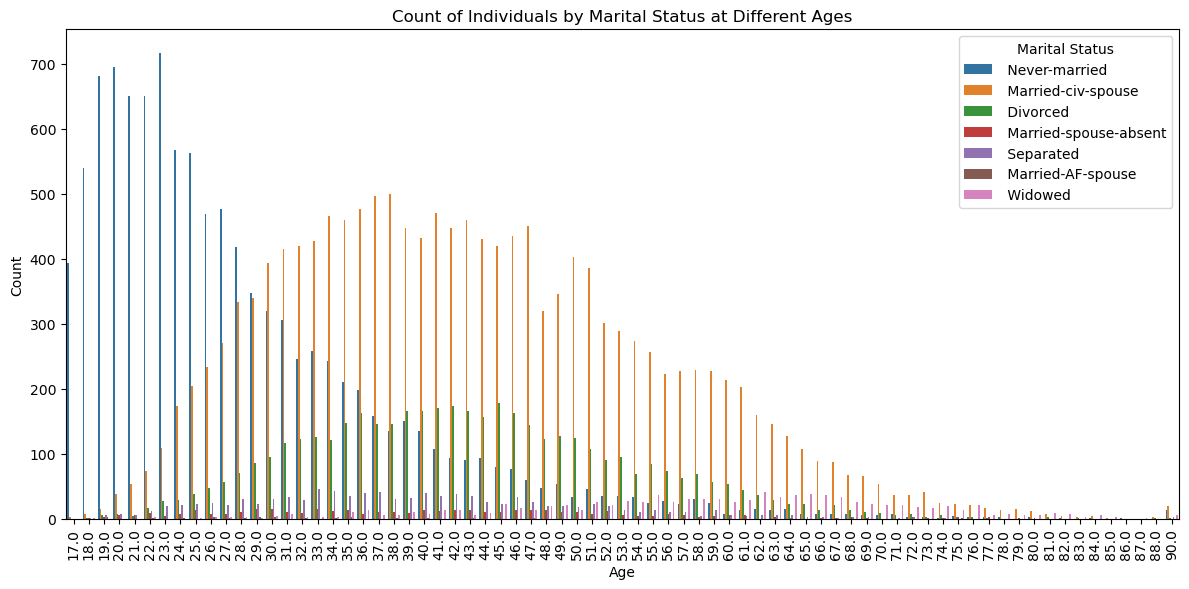

In [6]:

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='marital-status', data=df)
plt.title('Count of Individuals by Marital Status at Different Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

In [7]:
# Check for missing values
print("Missing Values:", df.isna().sum().sum())

# Check for '?' values
print("Question Mark Values:", (df.values == '?').sum())

# Remove NA and '?' values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Remove negative values if any
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)

df.dropna(inplace=True)


Missing Values: 0
Question Mark Values: 0


In [8]:
from scipy import stats

# Outlier detection and removal using Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
threshold = 3
df_cleaned = df[(z_scores < threshold).all(axis=1)]




In [9]:
df.dtypes


age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
df_cleaned.loc[:, 'income'] = le.fit_transform(df_cleaned['income'])

# Encode categorical variables
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == object:
        df_cleaned.loc[:, col] = le.fit_transform(df_cleaned[col])


# Separate features and target variable
X = df_cleaned.drop('income', axis=1)
y = df_cleaned['income']


C:\Users\dmwad\AppData\Local\Temp\ipykernel_5172\1548168533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'income'] = le.fit_transform(df_cleaned['income'])
C:\Users\dmwad\AppData\Local\Temp\ipykernel_5172\1548168533.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, col] = le.fit_transform(df_cleaned[col])
C:\Users\dmwad\AppData\Local\Temp\ipykernel_5172\1548168533.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the v

In [11]:
print(df)

        age          workclass  fnlwgt    education  education-num  \
0      39.0          State-gov   77516    Bachelors             13   
1      50.0   Self-emp-not-inc   83311    Bachelors             13   
2      38.0            Private  215646      HS-grad              9   
3      53.0            Private  234721         11th              7   
4      28.0            Private  338409    Bachelors             13   
...     ...                ...     ...          ...            ...   
32556  27.0            Private  257302   Assoc-acdm             12   
32557  40.0            Private  154374      HS-grad              9   
32558  58.0            Private  151910      HS-grad              9   
32559  22.0            Private  201490      HS-grad              9   
32560  52.0       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Mar

In [12]:
# Replace 'unknown' with 0 in the entire dataframe
df.replace('unknown', 0, inplace=True)


In [13]:
print(df)

        age          workclass  fnlwgt    education  education-num  \
0      39.0          State-gov   77516    Bachelors             13   
1      50.0   Self-emp-not-inc   83311    Bachelors             13   
2      38.0            Private  215646      HS-grad              9   
3      53.0            Private  234721         11th              7   
4      28.0            Private  338409    Bachelors             13   
...     ...                ...     ...          ...            ...   
32556  27.0            Private  257302   Assoc-acdm             12   
32557  40.0            Private  154374      HS-grad              9   
32558  58.0            Private  151910      HS-grad              9   
32559  22.0            Private  201490      HS-grad              9   
32560  52.0       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Mar

In [14]:
feature_columns=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week' ]

target_column='income'

In [15]:
print(df['age'].unique())


[39. 50. 38. 53. 28. 37. 49. 52. 31. 42. 30. 23. 32. 40. 34. 25. 43. 54.
 35. 59. 56. 19. 20. 45. 22. 48. 21. 24. 57. 44. 41. 29. 18. 47. 46. 36.
 79. 27. 67. 33. 76. 17. 55. 61. 70. 64. 71. 68. 66. 51. 58. 26. 60. 90.
 75. 65. 77. 62. 63. 80. 72. 74. 69. 73. 81. 78. 88. 82. 83. 84. 85. 86.
 87.]


In [16]:
# Remove non-numeric values from 'age' column
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows with NaN values (if any)
df = df.dropna(subset=['age'])

# Convert 'age' column to float
df['age'] = df['age'].astype(float)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'feature_columns' contains the column names of features and 'target_column' contains the name of the target variable
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df[target_column], test_size=0.2, random_state=42)

# Remove column names from feature columns
X_train = X_train.values
X_test = X_test.values

# Initialize and fit the model
reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)


LogisticRegression()

In [18]:
reg_predictions = reg_model.predict(X_test)

In [19]:
reg_accuracy = accuracy_score(y_test, reg_predictions)
reg_accuracy

0.7994779671426377

In [20]:

print("Regression Model Accuracy:", reg_accuracy)

Regression Model Accuracy: 0.7994779671426377


In [21]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [22]:
nb_predictions = nb_model.predict(X_test)

In [23]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naïve Bayes Model Accuracy:", nb_accuracy)

Naïve Bayes Model Accuracy: 0.7991708889912482


In [24]:
if reg_accuracy > nb_accuracy:
    print("Regression Model has higher accuracy:", reg_accuracy)
elif nb_accuracy > reg_accuracy:
    print("Naïve Bayes Model has higher accuracy:", nb_accuracy)
else:
    print("Both models have the same accuracy:", reg_accuracy)

Regression Model has higher accuracy: 0.7994779671426377


In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
reg_cm = confusion_matrix(y_test, reg_predictions)

print("Confusion Matrix for Regression Model:")
print(reg_cm)

Confusion Matrix for Regression Model:
[[4784  158]
 [1148  423]]


In [27]:
nb_cm = confusion_matrix(y_test, nb_predictions)

print("Confusion Matrix for Naïve Bayes Model:")
print(nb_cm)

Confusion Matrix for Naïve Bayes Model:
[[4702  240]
 [1068  503]]


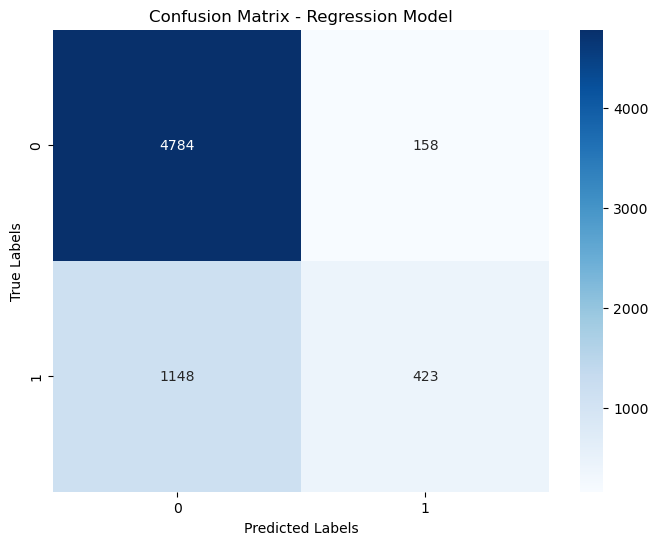

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(reg_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Regression Model')
plt.show()

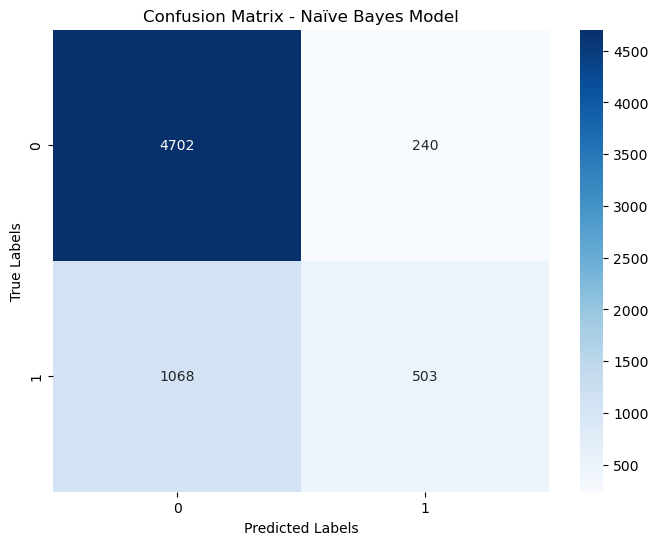

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naïve Bayes Model')
plt.show()

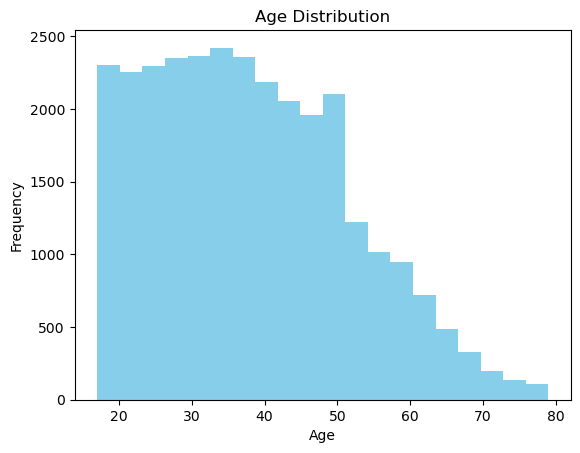

In [30]:
#Histogram for Age Distribution
plt.hist(df_cleaned['age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


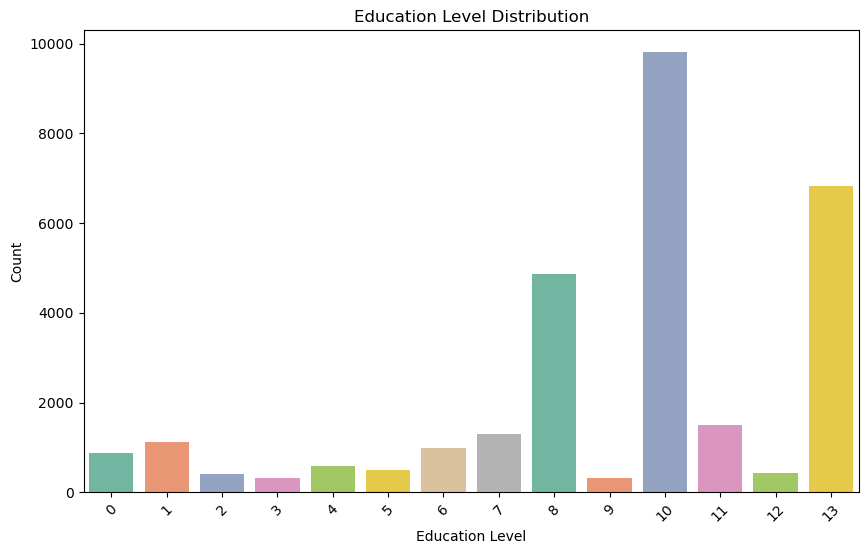

In [31]:
#Bar Plot for Education Level
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df_cleaned, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.show()


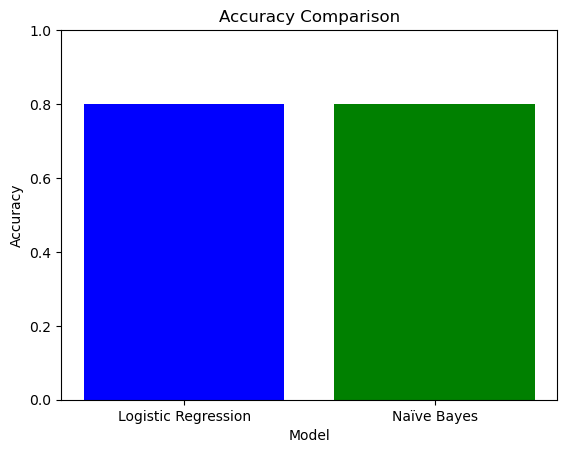

Logistic Regression Accuracy: 0.7994779671426377
Naïve Bayes Accuracy: 0.7991708889912482


In [32]:
plt.bar(['Logistic Regression', 'Naïve Bayes'], [reg_accuracy, nb_accuracy], color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

print("Logistic Regression Accuracy:", reg_accuracy)
print("Naïve Bayes Accuracy:", nb_accuracy)

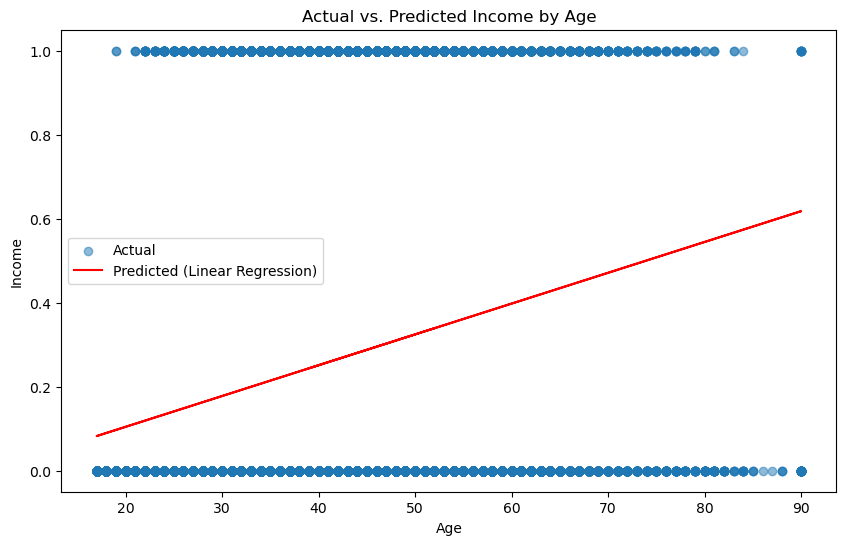

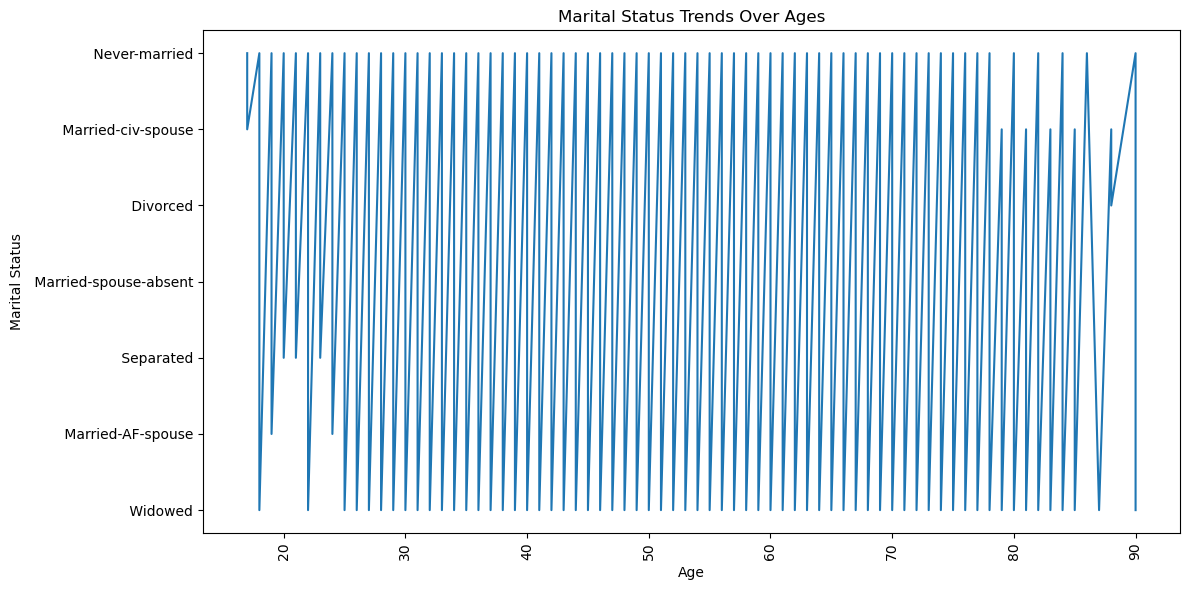

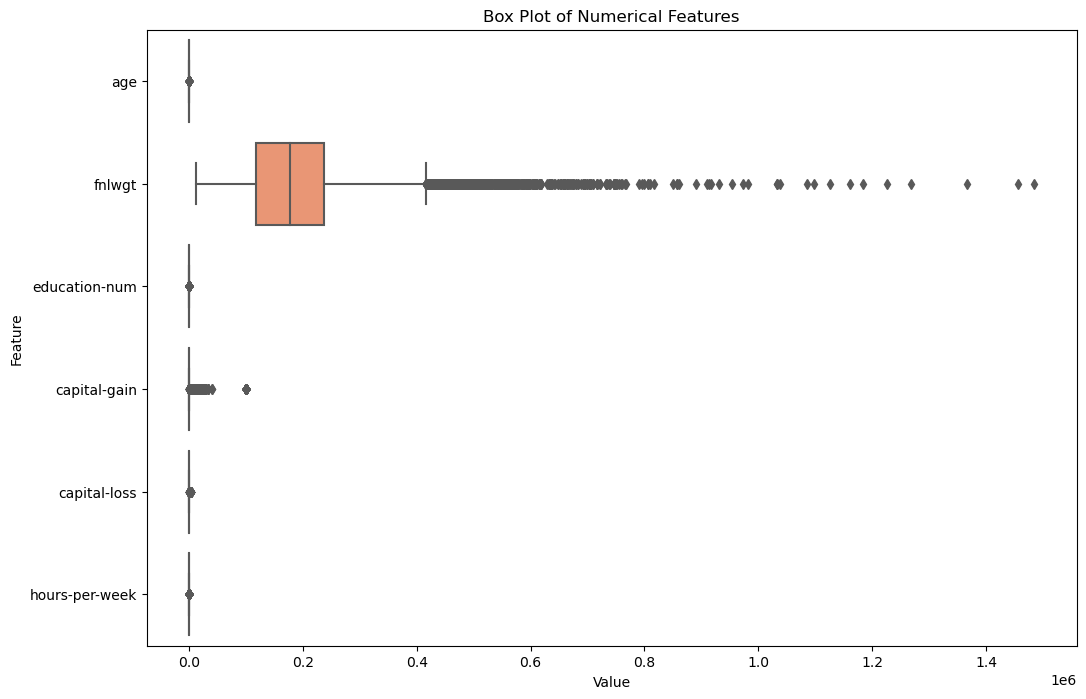

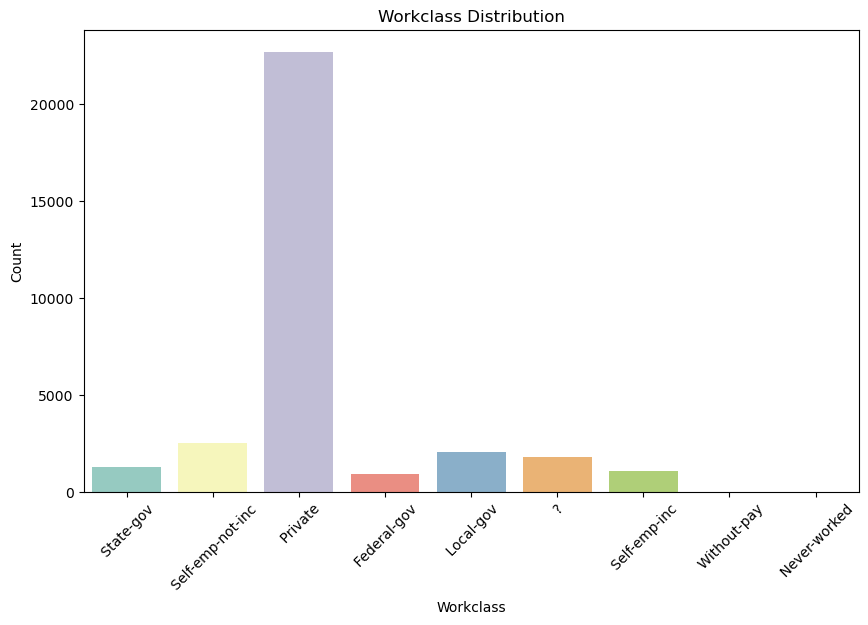

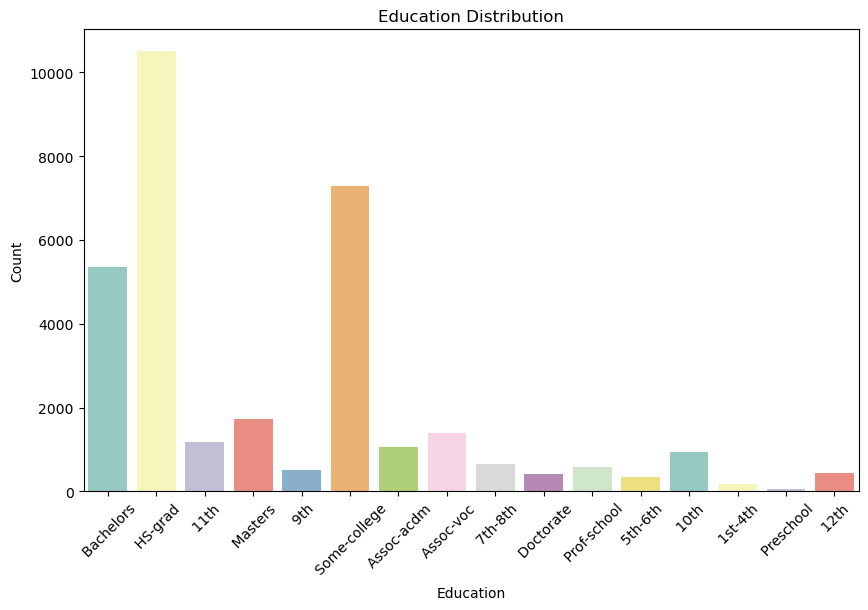

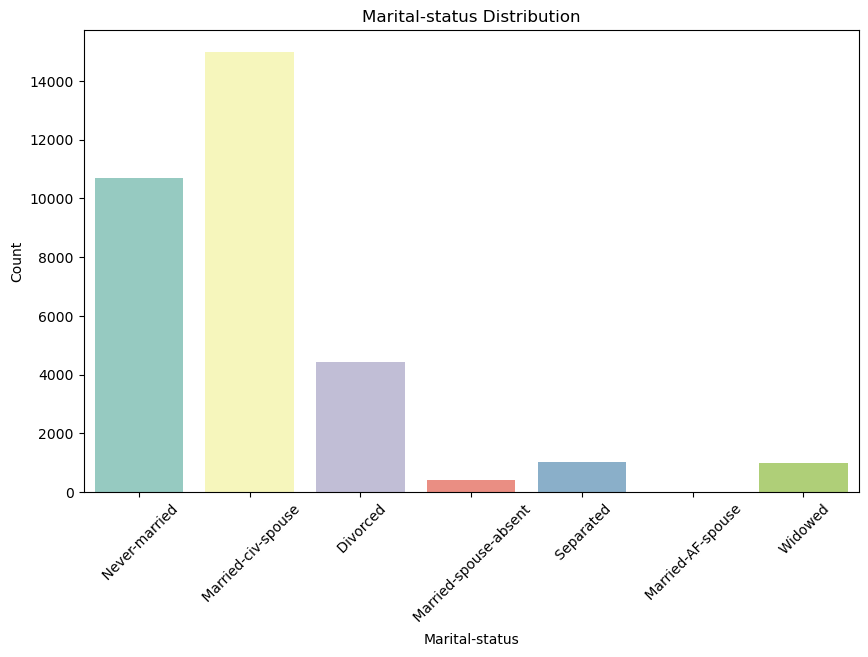

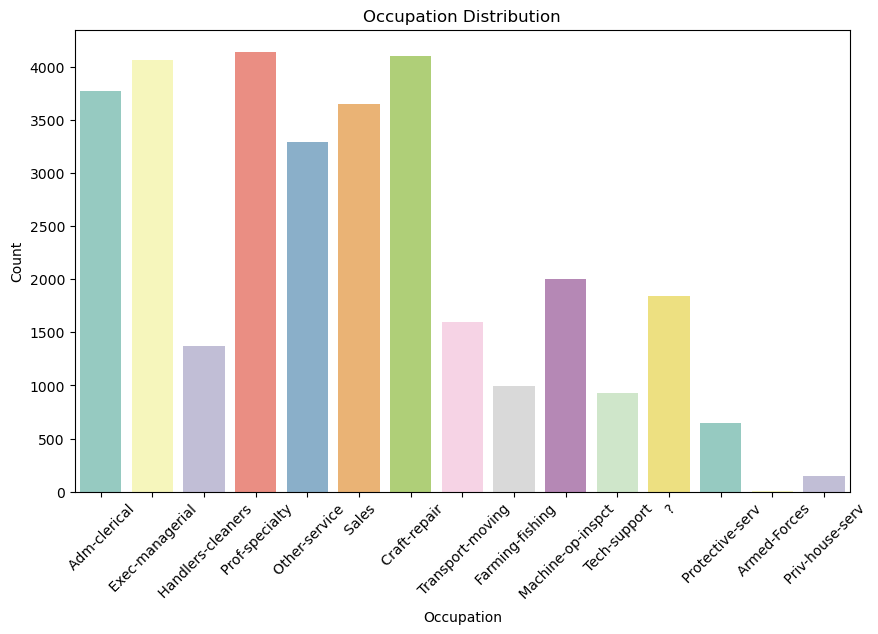

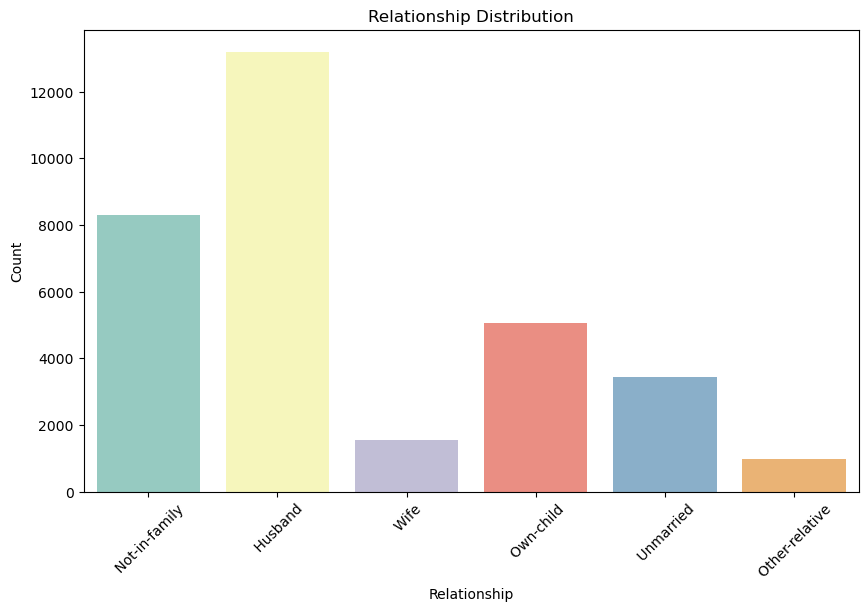

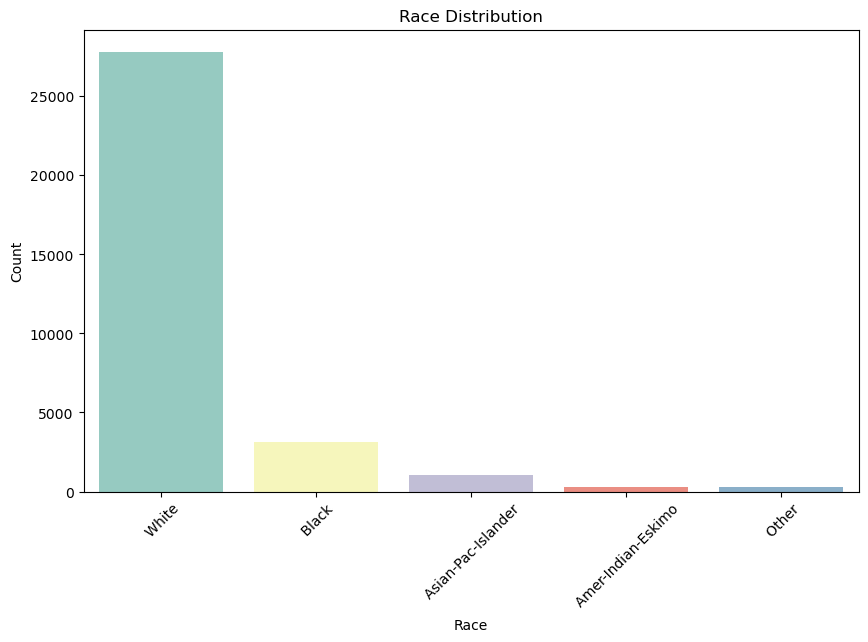

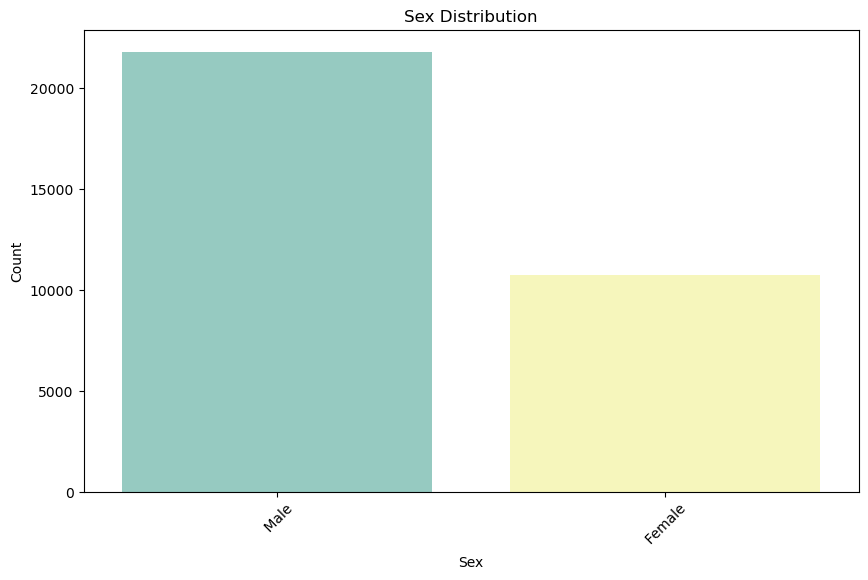

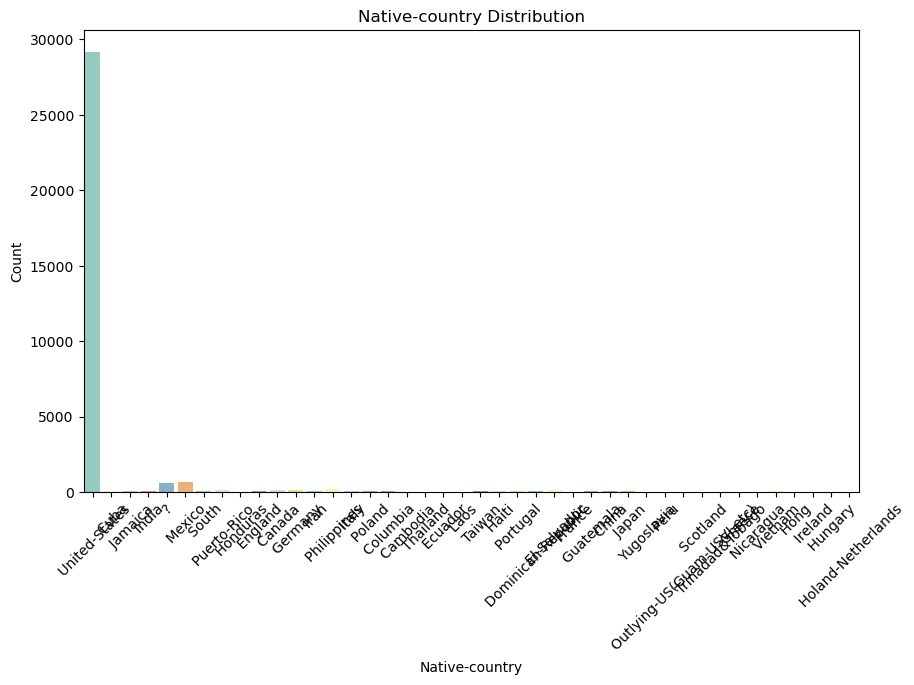

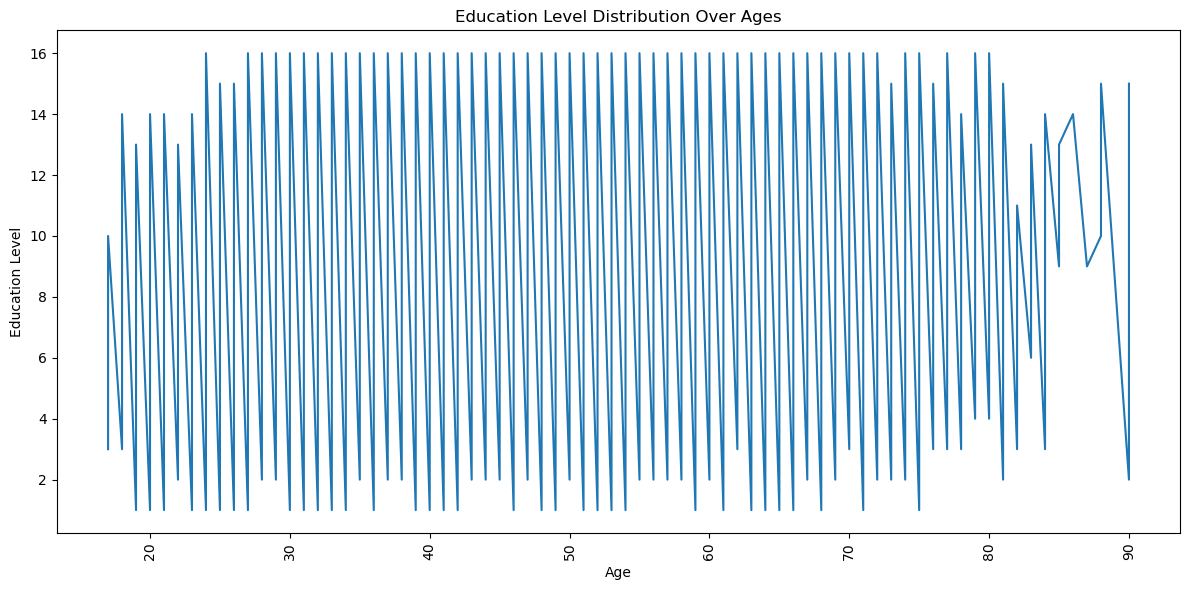

In [33]:
# Line Plot: Income Prediction by Age
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['income'], alpha=0.5, label='Actual')
plt.plot(df['age'], y_pred, color='red', label='Predicted (Linear Regression)')
plt.title('Actual vs. Predicted Income by Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

# Line Plot: Age vs. Marital Status
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='marital-status', data=df, estimator=None)
plt.title('Marital Status Trends Over Ages')
plt.xlabel('Age')
plt.ylabel('Marital Status')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Box Plot: Numerical Features
plt.figure(figsize=(12, 8))
df_numerical = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
sns.boxplot(data=df_numerical, orient="h", palette="Set2")
plt.title('Box Plot of Numerical Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

# Bar Plot: Categorical Features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, palette='Set3')
    plt.title(f'{feature.capitalize()} Distribution')
    plt.xlabel(f'{feature.capitalize()}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Line Plot: Education Level Distribution Over Ages
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='education-num', data=df, estimator=None)
plt.title('Education Level Distribution Over Ages')
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
